In [27]:
#pip install qiskit

In [28]:
#pip install qiskit[visualization]

In [29]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import numpy as np
import math as m

In [30]:
qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

steps=1

for i in range(steps):
  circuit.cx (qreg_q[1],qreg_q[0]);
  circuit.h (qreg_q[3]);
  circuit.cx (qreg_q[2],qreg_q[1]);
  circuit.cx (qreg_q[3],qreg_q[2]);
  circuit.cx (qreg_q[2],qreg_q[1]);
  circuit.cx (qreg_q[1],qreg_q[0]);
  circuit.ccx (qreg_q[0],qreg_q[1],qreg_q[2]);
  circuit.cx (qreg_q[0],qreg_q[1]);
  circuit.x (qreg_q[0]);
  circuit.cx (qreg_q[1],qreg_q[0]);
  circuit.cx (qreg_q[2],qreg_q[1]);
  circuit.cx (qreg_q[3],qreg_q[2]);
  circuit.cx (qreg_q[2],qreg_q[1]);
  circuit.cx (qreg_q[1],qreg_q[0]);


In [31]:
print("Depth: ", circuit.depth())

Depth:  13


In [32]:
print("Size: ", circuit.size())

Size:  14


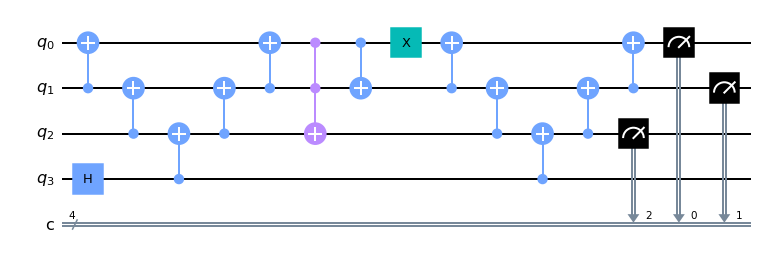

In [33]:
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw('mpl')

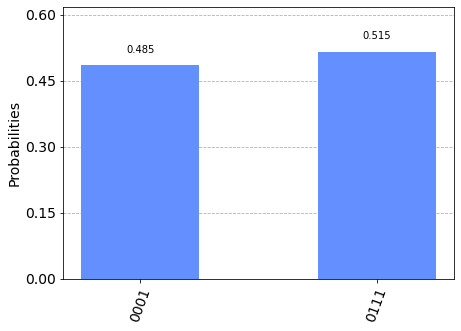

In [34]:
sim = qiskit.Aer.get_backend('qasm_simulator')
job = qiskit.execute(circuit,sim,shots=1024)
qiskit.visualization.plot_histogram(job.result().get_counts())